In [ ]:
#If opening in colab run this cell
!git clone https://github.com/bwolfson2/dsclass2022
%cd dsclass2022/Homeworks

To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/dsclass2022/blob/master/Homeworks/Homework_2_p1.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>

### Homework 2
We turn back to our prediction problem for sales, aiming to predict the probability of sales being less than a standard deviation of previous days.

In [2]:
path = "./retail_sales"
fn      = 'retail_sales.csv'
full_fn = path+'/'+fn
import pandas as pd
import numpy as np
df = pd.read_csv(full_fn)
df.dropna(axis='index', subset=['Sales'],inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['StateHoliday'] = df['StateHoliday'].astype('string')
df_train = df.loc[df['Date'] < '2014-07-01']
df_test  = df.loc[df['Date'] >= '2014-07-01']

/home/wolfs/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


0          1
1          1
2          1
3          1
4          1
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Open, Length: 1017209, dtype: int64

In [65]:
import numpy as np

working_df            = df_train.loc[df_train['Open'] != 0]  # eliminate observations for closed stores
working_df['lnSales'] = np.log(working_df.Sales+1)           # add 1 to account for for zero sales days
#working_df['lnSales'].hist()                                # make sure everything looks OK

mu    = working_df.lnSales.mean()     # calculate mean for z-scores
sigma = working_df.lnSales.std()      # calculate sd for z-scores
x     = np.array(working_df.lnSales)  # convert to np.array to permit vectorization
z     = (x - mu)/sigma

working_df['zSales'] = z
working_df['lowSalesFlag'] = np.where(z < -1, 1,0)

working_df = pd.get_dummies(working_df, columns=['DayOfWeek'], drop_first=True, dummy_na=False)
working_df = pd.get_dummies(working_df, columns=['StateHoliday'], drop_first=True, dummy_na=False)

working_df

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12324/308833607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['lnSales'] = np.log(working_df.Sales+1)           # add 1 to account for for zero sales days
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12324/308833607.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['zSales'] = z
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12324/308833607.py:13: SettingWithCopyWarning: 
A value is trying 

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday,lnSales,zSales,lowSalesFlag,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c
408420,1,2014-06-30,5738,641,1,1,0,8.655040,-0.190548,0,0,0,0,0,0,0,0,0,0
408421,2,2014-06-30,10682,1021,1,1,0,9.276409,1.239433,0,0,0,0,0,0,0,0,0,0
408422,3,2014-06-30,15689,1193,1,1,0,9.660779,2.124000,0,0,0,0,0,0,0,0,0,0
408423,4,2014-06-30,15672,1783,1,1,0,9.659695,2.121505,0,0,0,0,0,0,0,0,0,0
408424,5,2014-06-30,7954,784,1,1,0,8.981556,0.560876,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2013-01-01,3375,566,1,0,1,8.124447,-1.411624,1,1,0,0,0,0,0,1,0,0
1016827,733,2013-01-01,10765,2377,1,0,1,9.284148,1.257244,0,1,0,0,0,0,0,1,0,0
1016863,769,2013-01-01,5035,1248,1,0,1,8.524367,-0.491271,0,1,0,0,0,0,0,1,0,0
1017042,948,2013-01-01,4491,1039,1,0,1,8.410053,-0.754346,0,1,0,0,0,0,0,1,0,0


## Q1: Fit a statsmodel logit model to the data to estimate the probability that Sales will be 'low' for for a given day based on knowlege of observable day of the week and holiday features. Low being a standard deviation less than all sales. Use the code and baseline provided in HW 1 Solutions video

In [92]:
XXX

Optimization terminated successfully.
         Current function value: 0.366844
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           lowSalesFlag   No. Observations:               503607
Model:                          Logit   Df Residuals:                   503595
Method:                           MLE   Df Model:                           11
Date:                Thu, 06 Jan 2022   Pseudo R-squ.:                  0.1072
Time:                        12:31:42   Log-Likelihood:            -1.8475e+05
converged:                       True   LL-Null:                   -2.0692e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.5897      0.013   -122.632      0.000      -1.615      -1.564
Promo            

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12324/741428167.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['lnSales'] = np.log(testing_df.Sales+1)          # add 1 to account for for zero sales days
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12324/741428167.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['zSales'] = z
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12324/741428167.py:24: SettingWithCopyWarning: 
A value is trying 

In [73]:
accuracy = (pred == true).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


## Q2: Fit an sklearn Logistic Regression to the data, report your results as above. Were they significantly different? Why or why not? This question may require you checking out the documentation

In [114]:
XXX


In [2]:
print(f"Accuracy: {(pred == true).mean():.2f}")

## Q3 Fit a Tree Classifier (sklearn) to model the probability that sales will be low. What are the most important features? What does this tell you about the data?

In [117]:
from sklearn.tree import DecisionTreeClassifier
model = XXX
model.fit(XXX)
pred = model.predict(XXX)
true = testing_df[target_col]

print(f"Accuracy: {(pred == true).mean():.2f}")

Accuracy: 0.89


In [ ]:
### Print feature importances
XXX

## Q4 (Regression Trees) Let's build a regression tree to model Log Sales. Compare it with a Linear Regression -- does it work better?

In [144]:
## Helper function
def report_reg_results(model,train_X,train_Y,test_X,test_Y):
    model.fit(train_X,train_Y)

    pred = model.predict(test_X)
    act = test_Y
    errors    = pred - act
    err       = np.array(errors)

    err2      = np.mean(err**2)
    MAD       = np.abs(np.median(err))
    RMS       = np.sqrt(np.mean(err2))
    r         = np.corrcoef(act,pred)[0,1]
    pseudo_R2 = r**2

    print('RMS = %.3f; MAD= %.3f; pseudo-R2 = %.3f' % (RMS,MAD,pseudo_R2))

    pred_df = pd.DataFrame({"actual":act, "predicted":pred})
    plt_df  = pred_df.sample(n=1000, replace=False, random_state=123).sort_index()
    plt_min = np.min(np.min(plt_df))
    plt_max = np.max(np.max(plt_df))
    plt_col = np.where(plt_df['actual']<plt_df['predicted'],"red","blue")

    fig, ax = plt.subplots()
    ax.scatter(plt_df['actual'], y=plt_df['predicted'],c=plt_col)
    ax.set_xlim(plt_min,plt_max)
    ax.set_ylim(plt_min,plt_max)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("lnSales: Actual vs. Predicted")
    fig
    print(pred_df.describe())

In [4]:
XXXX

## Q5: Discuss your results. Why are the predictors performing similarly in both classification and regression? What do you think can make them better?

In [3]:
# XXXX

## Part 2

# Predicting Churn

After discussing the churn problem at TelCo with Henrietta for a while (remember, from your pre-class assignment?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. 

You've been authorized to give the retention offer to up to 25% of the customers whose contract is expiring. It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. The historical data includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
a- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [3]:
import numpy as np
import pandas as pd

# Just change the path below so that it points to your file.
data_path = "./data-hw2.csv" 

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)

__2. Split the data into 80% training data and 20% test data.__

In [4]:
# Your code goes here

__3. Build the best model you can for each of the following three model types:__
- __A decision tree classifier. Try different values for the parameter min_samples_leaf.__
- __A logistic regression. Try different values for the parameter C.__
- __A third model of your choice. Some suggestions: KNN, SVM, etc. Try different paramater values for this one too.__

__Optimize in terms of their generalization performance using ROC Area and cross-validation with 10 folds. Remember to use only the training data (do not use the test data at all for this example). For each of these model types, you should report the best parameter value you found and the corresponding ROC Area in the cross-validation. Your code should also show the process you went through to try different complexity parameter(s) for each model type. Pick one model to move forward with. Why did you select this one?__

__HINT: There is an example below of the ROC Area for a DecisionTreeClassifier using cross validation.__  

In [5]:
# The code below is just meant as an example for you to compute the ROC Area using cross validation.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

target = "Churn_Yes"
predictors = df.columns[df.columns != target]
example_model = DecisionTreeClassifier()
# Remember to only use the training data here!!
avg_auc = cross_val_score(example_model, df[predictors], df[target], cv=10, scoring="roc_auc").mean()
print(avg_auc)

0.6698755287051471


In [6]:
# Your code goes here

__4. Use your test data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together). Would you consider changing the selected model after looking at the curves? If yes, explain why. If not, explain what would the curves need to look like for you to consider changing the selected model.__

__HINT: There is an example below of the ROC curve for the DecisionTreeClassifier that was used earlier__

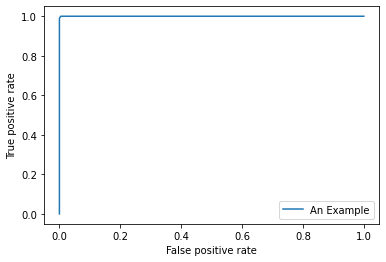

In [7]:
# The code below is just meant as an example for you to plot the ROC curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Remember to use the training data here!! 
example_model.fit(df[predictors], df[target])
# And to use the test data here!!
probs = example_model.predict_proba(df[predictors])[:, 1]
fpr, tpr, thresholds = roc_curve(df[target], probs)
plt.plot(fpr, tpr, label="An Example")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

In [8]:
# Your code goes here 